<a href="https://colab.research.google.com/github/souradipta93/AI-applications/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The goal of this exercise is to cluster (or group) people into different groups to target the right content for users. 
#The datset comes from Netflix database and we will explore the characteristics that people share in movies’ taste, based on how they rate them. 
# The data used here is a sample of the bigger dataset avaiavle at https://grouplens.org/datasets/movielens/
# Please read the instructions on the website for proper use of data.
from google.colab import files
uploaded = files.upload()

Saving movies_data.csv to movies_data (1).csv


In [ ]:
import pandas as pd
import io 
movies_ratings = pd.read_csv(io.BytesIO(uploaded['movies_data.csv'])) 

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline # use of thid line - https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

Text(0, 0.5, 'Comedy')

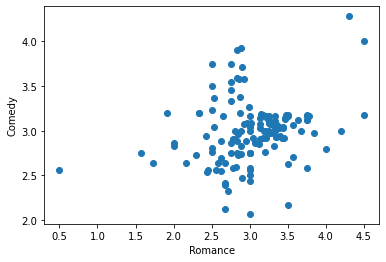

In [ ]:
plt.scatter(movies_ratings.avg_romance_rating,movies_ratings.avg_comedy_rating)
plt.xlabel('Romance')
plt.ylabel('Comedy')

In [ ]:
km = KMeans(n_clusters=5, n_init=10)# init is for number of iterations, it's usually is 50 but depends on data amount and no. of columns
y_predicted = km.fit_predict(movies_ratings[['avg_romance_rating','avg_comedy_rating']])
y_predicted

array([4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 2, 1, 3, 3, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
movies_ratings['cluster']=y_predicted
movies_ratings.head()

,index,avg_romance_rating,avg_comedy_rating,cluster
0,55,0.50,2.56,4
1,255,1.57,2.75,4
2,76,1.73,2.64,4
3,502,1.92,3.20,4
4,360,2.00,2.83,4


In [ ]:
km.cluster_centers_ # this gives coordinates of cluster centroids

array([[3.94285714, 3.19142857],
       [2.77      , 2.65926829],
       [3.24672414, 3.02896552],
       [2.7       , 3.49263158],
       [1.69857143, 2.78285714]])

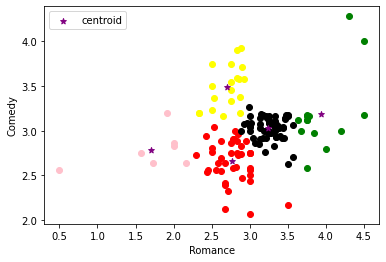

In [ ]:
df1 = movies_ratings[movies_ratings.cluster==0]
df2 = movies_ratings[movies_ratings.cluster==1]
df3 = movies_ratings[movies_ratings.cluster==2]
df4 = movies_ratings[movies_ratings.cluster==3]
df5 = movies_ratings[movies_ratings.cluster==4]
plt.scatter(df1.avg_romance_rating,df1['avg_comedy_rating'],color='green')
plt.scatter(df2.avg_romance_rating,df2['avg_comedy_rating'],color='red')
plt.scatter(df3.avg_romance_rating,df3['avg_comedy_rating'],color='black')
plt.scatter(df4.avg_romance_rating,df4['avg_comedy_rating'],color='yellow')
plt.scatter(df5.avg_romance_rating,df5['avg_comedy_rating'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Romance')
plt.ylabel('Comedy')
plt.legend()

## ***So we can see within cluster looks compact but, distances between clusters is still ambiguous***


In [ ]:
sse = [] # for sum of square error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(movies_ratings[['avg_romance_rating','avg_comedy_rating']])
    sse.append(km.inertia_)

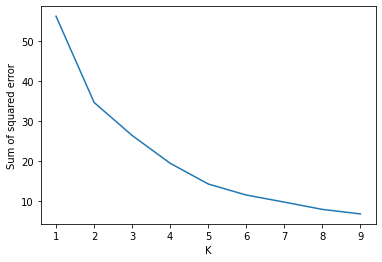

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)